In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
x = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [7]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(x)

In [8]:
scaled_df

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [9]:
# optional
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components,columns=['PCA1', 'PCA2'])
pca_df

,PCA1,PCA2
0,-0.615720,-1.763481
1,-1.665793,-1.820747
2,0.337862,-1.674799
3,-1.456573,-1.772430
4,-0.038465,-1.662740
...,...,...
195,-1.093705,2.215577
196,0.800448,2.540748
197,-1.119709,2.445169
198,0.395411,2.946665


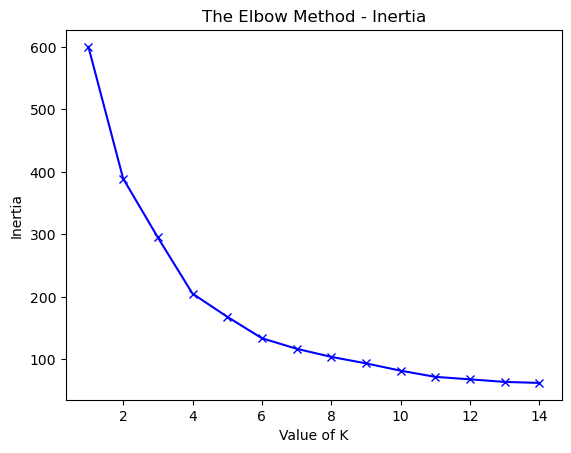

In [10]:
# Determine value of K
inertia = []
range_val = range(1,15)
for i in range_val:
    Kmeans = KMeans(n_clusters=i)
    Kmeans.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(Kmeans.inertia_)

plt.plot(range_val,inertia, 'bx-')
plt.xlabel('Value of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method - Inertia')
plt.show()

    

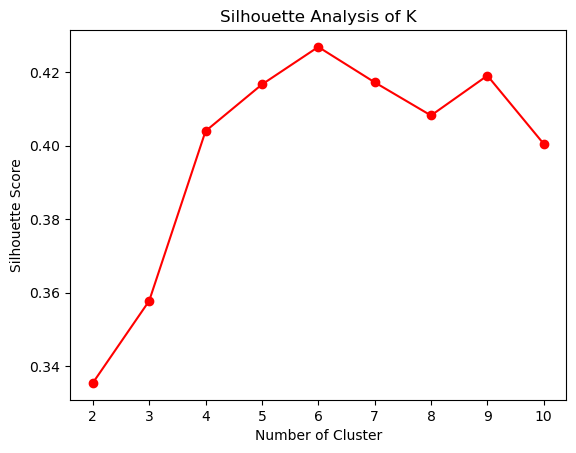

In [15]:
from sklearn.metrics import silhouette_samples
sil_list = []
for i in range(2,11):
    model = KMeans(n_clusters = i)
    sil_list.append(silhouette_samples(scaled_df,model.fit_predict(scaled_df)).mean())
plt.plot(range(2,11),sil_list,c='r',marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis of K')
plt.show()

In [16]:
kmeans_model = KMeans(5)
kmeans_model.fit(scaled_df)
pca_df_kmeans = pd.concat([pca_df,pd.DataFrame(kmeans_model.labels_,columns=['Cluster'])],axis=1)

In [18]:
pca_df_kmeans

,PCA1,PCA2,Cluster
0,-0.615720,-1.763481,1
1,-1.665793,-1.820747,1
2,0.337862,-1.674799,4
3,-1.456573,-1.772430,1
4,-0.038465,-1.662740,1
...,...,...,...
195,-1.093705,2.215577,3
196,0.800448,2.540748,2
197,-1.119709,2.445169,3
198,0.395411,2.946665,2


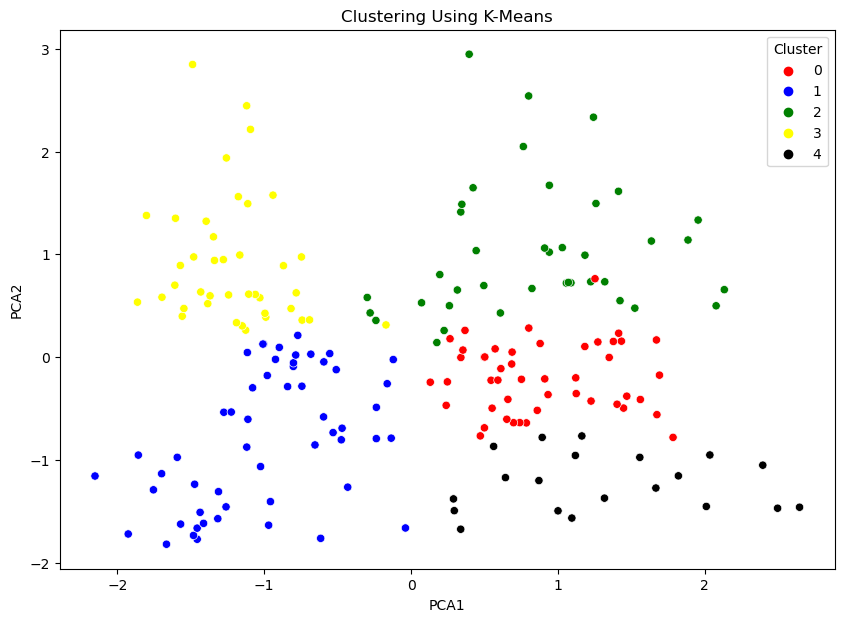

In [23]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='PCA1',y='PCA2',hue='Cluster',data=pca_df_kmeans,palette=['red','blue','green','yellow','black'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clustering Using K-Means')
plt.show()

In [24]:
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)

In [25]:
cluster_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


In [26]:
cluster_0_df = cluster_df[cluster_df['Cluster']==0]
cluster_0_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
40,41,Female,65,38,35,0
46,47,Female,50,40,55,0
50,51,Female,49,42,52,0
53,54,Male,59,43,60,0
54,55,Female,50,43,45,0
55,56,Male,47,43,41,0
56,57,Female,51,44,50,0
57,58,Male,69,44,46,0
59,60,Male,53,46,46,0
60,61,Male,70,46,56,0


In [27]:
cluster_1_df = cluster_df[cluster_df['Cluster']==1]
cluster_1_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
5,6,Female,22,17,76,1
7,8,Female,23,18,94,1
9,10,Female,30,19,72,1
11,12,Female,35,19,99,1
13,14,Female,24,20,77,1
15,16,Male,22,20,79,1


In [28]:
cluster_2_df = cluster_df[cluster_df['Cluster']==2]
cluster_2_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
112,113,Female,38,64,42,2
121,122,Female,38,67,40,2
124,125,Female,23,70,29,2
126,127,Male,43,71,35,2
128,129,Male,59,71,11,2
130,131,Male,47,71,9,2
132,133,Female,25,72,34,2
134,135,Male,20,73,5,2
136,137,Female,44,73,7,2
138,139,Male,19,74,10,2


In [29]:
cluster_3_df = cluster_df[cluster_df['Cluster']==3]
cluster_3_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
122,123,Female,40,69,58,3
123,124,Male,39,69,91,3
125,126,Female,31,70,77,3
127,128,Male,40,71,95,3
129,130,Male,38,71,75,3
131,132,Male,39,71,75,3
133,134,Female,31,72,71,3
135,136,Female,29,73,88,3
137,138,Male,32,73,73,3
139,140,Female,35,74,72,3


In [30]:
cluster_4_df = cluster_df[cluster_df['Cluster']==4]
cluster_4_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
2,3,Female,20,16,6,4
6,7,Female,35,18,6,4
8,9,Male,64,19,3,4
10,11,Male,67,19,14,4
12,13,Female,58,20,15,4
14,15,Male,37,20,13,4
16,17,Female,35,21,35,4
18,19,Male,52,23,29,4
20,21,Male,35,24,35,4
22,23,Female,46,25,5,4


In [31]:
cluster_df.to_csv('Clustered_Mall_Customer.csv')
